<a href="https://colab.research.google.com/github/pvsk0226/IMDb-Movie-Analysis/blob/main/EDA_IMDb_web_scrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving combined_output_clean.csv to combined_output_clean.csv


In [ ]:
import pandas as pd
csv_file = "/content/combined_output_clean.csv"   # since file was uploaded to Colab
df = pd.read_csv(csv_file)

In [ ]:
# To know the no of Rows and Column
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

Rows: 19274
Columns: 5


In [ ]:
 #To know the column name
print(df.columns)

Index(['Movie Name', 'Genre', 'Rating', 'Voting Counts', 'Duration'], dtype='object')


In [ ]:
#Checking data types
df.dtypes

,0
Movie Name,object
Genre,object
Rating,float64
Voting Counts,float64
Duration,float64


In [ ]:
#To show the statistical summary of Rating, Voting, Duration
df.describe()

,Rating,Voting Counts,Duration
count,19274.000000,19274.000000,19274.000000
mean,6.410844,1038.564387,93.317838
std,1.171090,11072.384630,19.210977
min,1.000000,0.000000,60.000000
25%,6.354506,0.000000,86.000000
50%,6.354506,8.000000,86.000000
75%,6.700000,68.000000,100.000000
max,9.900000,659000.000000,240.000000


In [ ]:
#Display first 5 rows
df.head()

,Movie Name,Genre,Rating,Voting Counts,Duration
0,# 1 Fan,Comedy,6.354506,0.0,86.0
1,#Aay,Comedy,6.400000,831.0,142.0
2,#Amfad: All My Friends Are Dead,"Horror,Mystery,Thriller",4.500000,1300.0,91.0
3,#Comicsgate - How To Kill A Movement,Documentary,6.354506,0.0,127.0
4,#Familyman,Drama,6.354506,0.0,125.0


In [ ]:
# To know whether there is any null values
df.isnull().sum()

,0
Movie Name,0
Genre,0
Rating,0
Voting Counts,0
Duration,0


**DATA CLEANING RECAP**

In [ ]:
#During web scraping from IMDb 2024, some values such as Rating, Voting Counts,
and Duration were missing in the extracted CSV files. This is due to dynamic page loading
and scraping limitations. Since the IMDb site does have these values, the missing entries
are a scraping limitation and not actual missing data. To maintain dataset consistency,
imputation was done during the data cleaning stage.”

1.Dropping of extra column "Voting count"
2.Duration is converted from text format (“2h 10m”) into numeric minutes (130) for computation.
3.Voting is converted from text format (12K) to numeric (12000) for computation purpose.
4.Missing Rating and Voting values are replaced with mean values
5.Same movie mapped to multiple genres are formated by grouping movie name and merging genres.

**Exploratory Data Analysis**

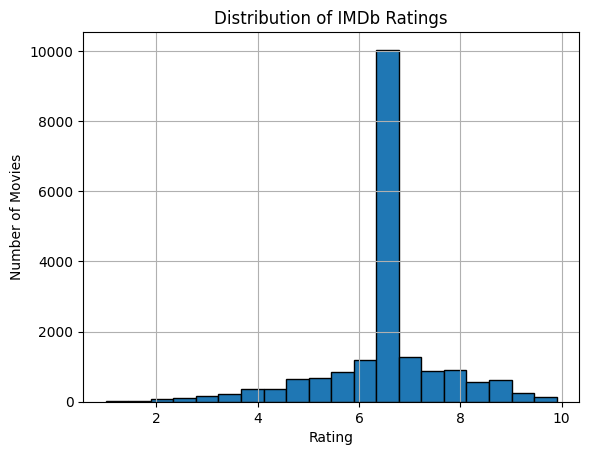

In [ ]:
# RATING DISTRIBUTION
import matplotlib.pyplot as plt

df["Rating"].hist(bins=20, edgecolor="black")
plt.xlabel("Rating")
plt.ylabel("Number of Movies")
plt.title("Distribution of IMDb Ratings")
plt.show()

**Rating Distribution**

Most movies in IMDb 2024 dataset are “average” or “good” (6–7 range).

Very few are masterpieces (9+) or disasters (below 3).

The distribution is slightly skewed toward the middle, which makes sense because IMDb users tend to give moderate ratings.

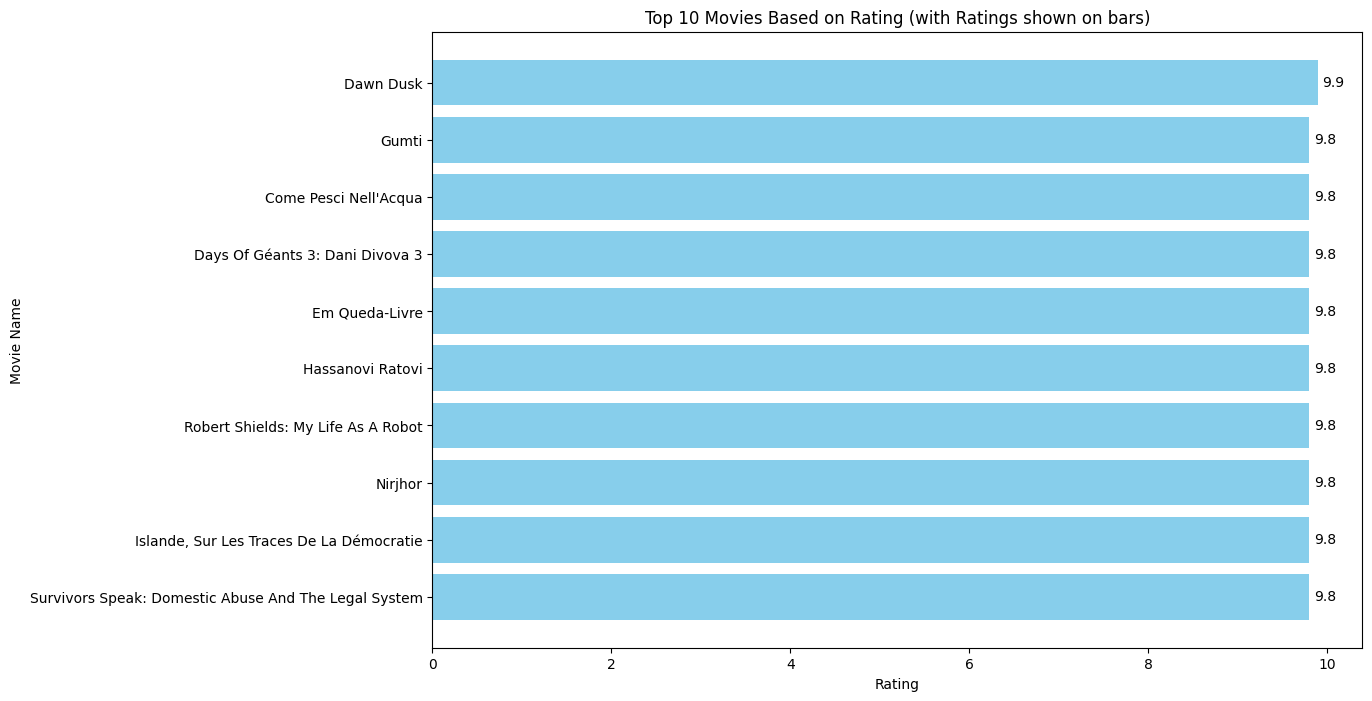

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

# Plot Ratings as bars
plt.barh(top_movies["Movie Name"], top_movies["Rating"], color="skyblue")

# Add Rating text at the end of each bar
for i, (rating, votes) in enumerate(zip(top_movies["Rating"], top_movies["Voting Counts"])):
    plt.text(rating + 0.05, i, f"{rating:.1f}", va='center', fontsize=10, color="black")

plt.xlabel("Rating")
plt.ylabel("Movie Name")
plt.title("Top 10 Movies Based on Rating (with Ratings shown on bars)")
plt.gca().invert_yaxis()  # Show highest at top
plt.show()


**Top 10 Movies based on rating**

The top 10 movies have rating 9.9 and 9.8

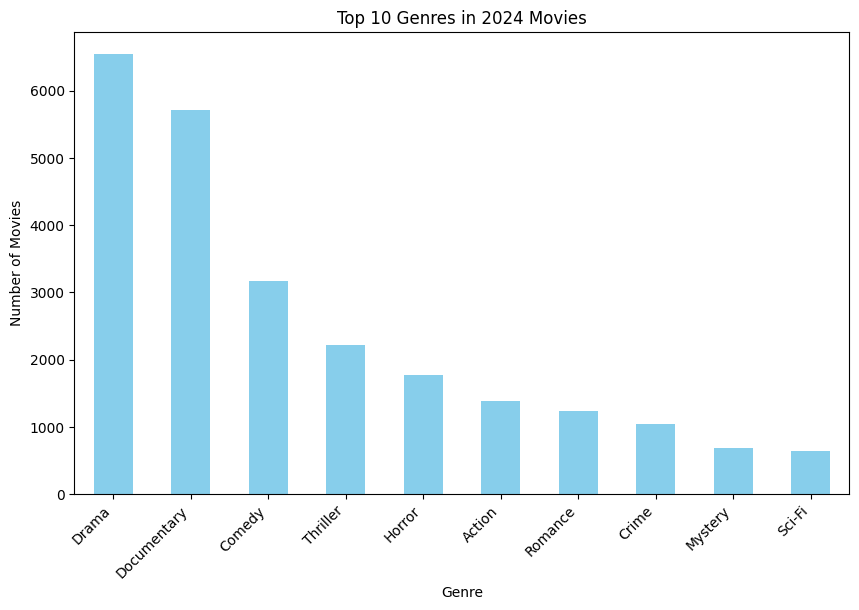

In [ ]:
# Split genres into individual ones
all_genres = df['Genre'].dropna().str.split(",")

# Flatten the list
all_genres = [g.strip() for sublist in all_genres for g in sublist]

# Count frequencies
import pandas as pd
genre_counts = pd.Series(all_genres).value_counts()

# Plot top 10 genres
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
genre_counts.head(10).plot(kind="bar", color="skyblue")
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.title("Top 10 Genres in 2024 Movies")
plt.xticks(rotation=45, ha="right")
plt.show()


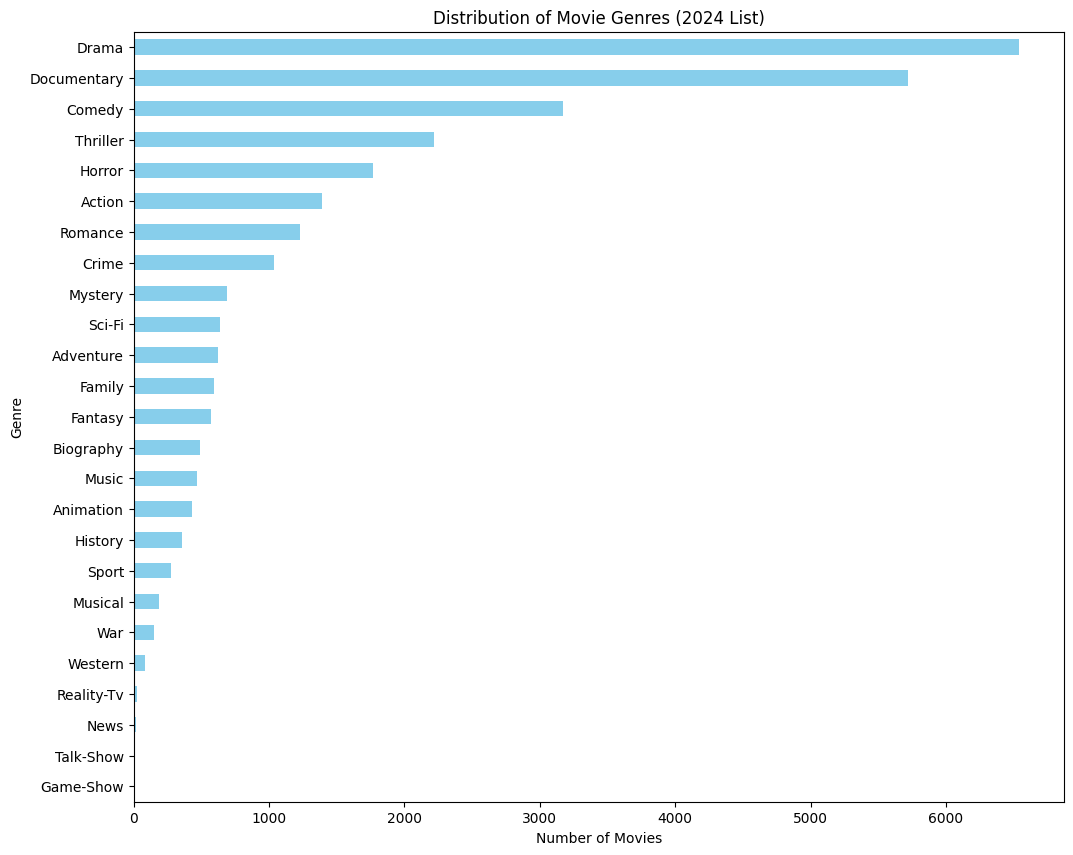

In [ ]:
import matplotlib.pyplot as plt

# Split genres into individual ones
all_genres = df['Genre'].dropna().str.split(",")
all_genres = [g.strip() for sublist in all_genres for g in sublist]

# Count frequencies
genre_counts = pd.Series(all_genres).value_counts()

# Plot all genres as horizontal bar chart
plt.figure(figsize=(12,10))
genre_counts.plot(kind="barh", color="skyblue")
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.title("Distribution of Movie Genres (2024 List)")
plt.gca().invert_yaxis()  # so largest is on top
plt.show()



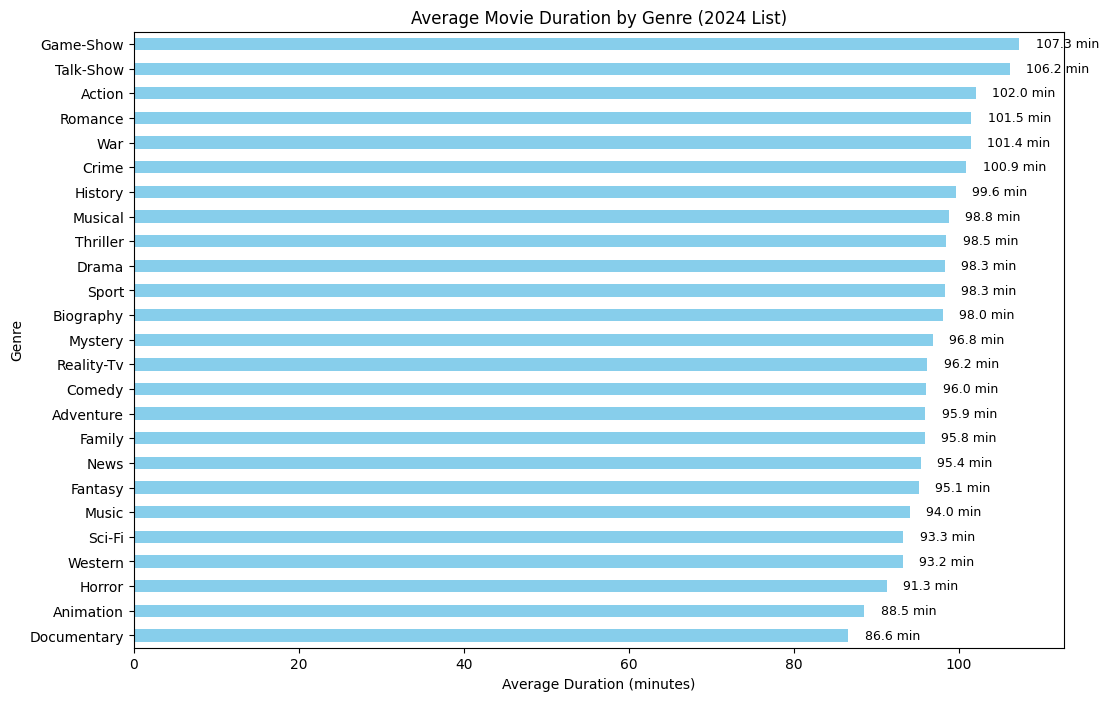

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Split genres properly
df_genre_split = df.copy()
df_genre_split["Genre"] = df_genre_split["Genre"].str.split(",")

# Step 2: Explode so each genre has its own row
df_genre_split = df_genre_split.explode("Genre")
df_genre_split["Genre"] = df_genre_split["Genre"].str.strip()

# Step 3: Group by genre and calculate average duration
genre_duration = df_genre_split.groupby("Genre")["Duration"].mean().sort_values(ascending=False)

# Step 4: Plot
plt.figure(figsize=(12,8))
bars = genre_duration.plot(kind="barh", color="skyblue")

# Add average duration values at the end of each bar
for i, v in enumerate(genre_duration):
    plt.text(v + 2, i, f"{v:.1f} min", va="center", fontsize=9)

plt.xlabel("Average Duration (minutes)")
plt.ylabel("Genre")
plt.title("Average Movie Duration by Genre (2024 List)")
plt.gca().invert_yaxis()  # Largest duration on top
plt.show()


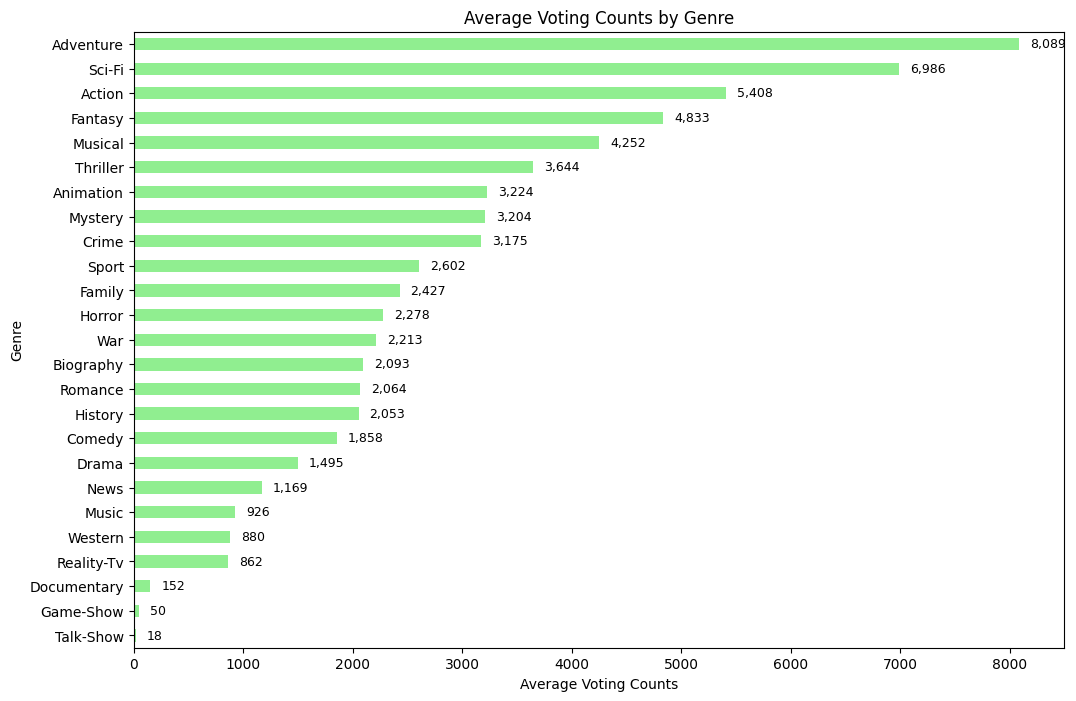

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Split genres properly
df_genre_split = df.copy()
df_genre_split["Genre"] = df_genre_split["Genre"].str.split(",")

# Step 2: Explode genres into separate rows
df_genre_split = df_genre_split.explode("Genre")
df_genre_split["Genre"] = df_genre_split["Genre"].str.strip()

# Step 3: Group by Genre and calculate average voting counts
genre_votes = df_genre_split.groupby("Genre")["Voting Counts"].mean().sort_values(ascending=False)

# Step 4: Plot
plt.figure(figsize=(12,8))
bars = genre_votes.plot(kind="barh", color="lightgreen")

# Add average votes at the end of each bar
for i, v in enumerate(genre_votes):
    plt.text(v + 100, i, f"{int(v):,}", va="center", fontsize=9)  # formatted with commas

plt.xlabel("Average Voting Counts")
plt.ylabel("Genre")
plt.title("Average Voting Counts by Genre")
plt.gca().invert_yaxis()  # Highest votes on top
plt.show()


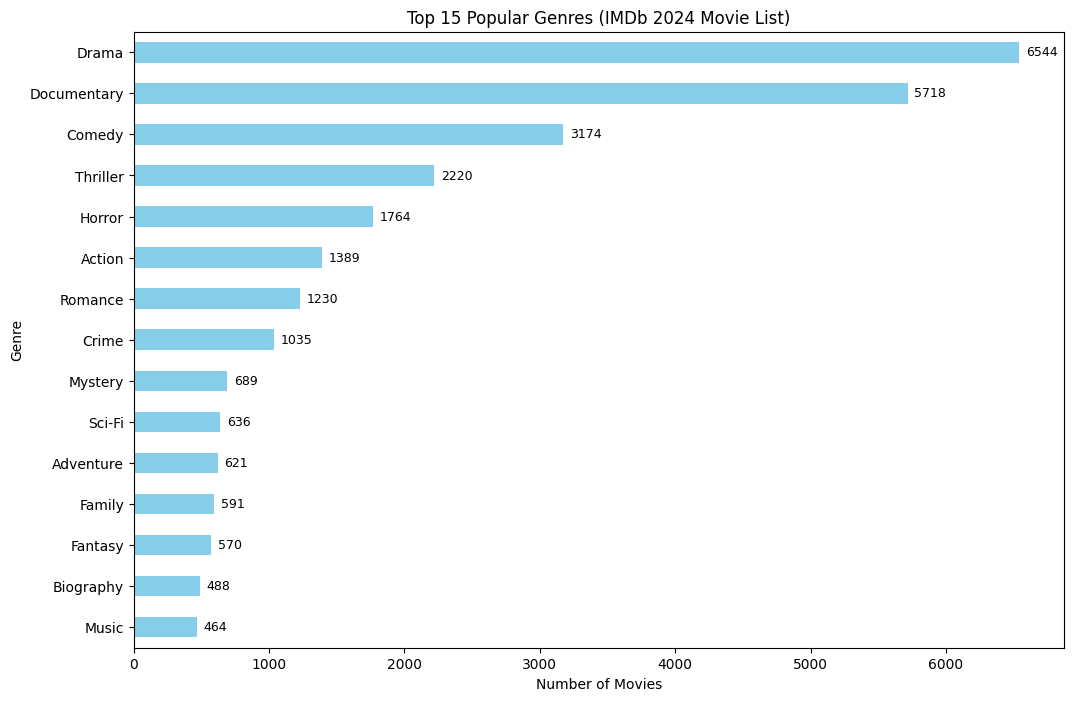

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Split and clean genres
df_genre_split = df.copy()
df_genre_split["Genre"] = df_genre_split["Genre"].str.split(",")
df_genre_split = df_genre_split.explode("Genre")
df_genre_split["Genre"] = df_genre_split["Genre"].str.strip()

# Step 2: Count movies per genre
genre_counts = df_genre_split["Genre"].value_counts()

# Step 3: Plot Top 15 genres
plt.figure(figsize=(12,8))
bars = genre_counts.head(15).plot(kind="barh", color="skyblue")

# Add counts at the end of each bar
for i, v in enumerate(genre_counts.head(15)):
    plt.text(v + 50, i, str(v), va="center", fontsize=9)

plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.title("Top 15 Popular Genres (IMDb 2024 Movie List)")
plt.gca().invert_yaxis()
plt.show()


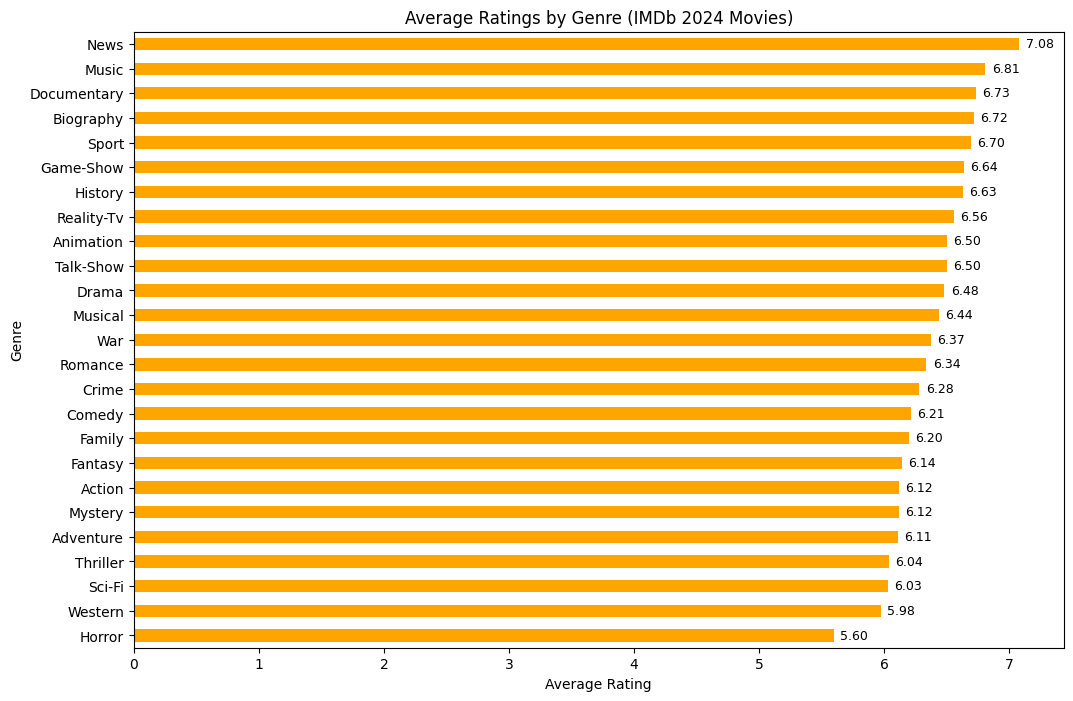

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Split genres
df_genre_split = df.copy()
df_genre_split["Genre"] = df_genre_split["Genre"].str.split(",")
df_genre_split = df_genre_split.explode("Genre")
df_genre_split["Genre"] = df_genre_split["Genre"].str.strip()

# Step 2: Calculate average rating per genre
genre_rating = df_genre_split.groupby("Genre")["Rating"].mean().sort_values(ascending=False)

# Step 3: Plot
plt.figure(figsize=(12,8))
bars = genre_rating.plot(kind="barh", color="orange")

# Add rating values at the end
for i, v in enumerate(genre_rating):
    plt.text(v + 0.05, i, f"{v:.2f}", va="center", fontsize=9)

plt.xlabel("Average Rating")
plt.ylabel("Genre")
plt.title("Average Ratings by Genre (IMDb 2024 Movies)")
plt.gca().invert_yaxis()
plt.show()


Shortest Movies:
                         Movie Name  Duration
684                      Acid Burma      60.0
2772                Burning Goddess      60.0
18740             Why Not Scotland?      60.0
12250      Pisces - The Documentary      60.0
1169   An Angel Knocking On My Door      60.0

Longest Movies:
                             Movie Name  Duration
14973            Talán Most Senki Sincs     240.0
5147                    Escape The City     240.0
220                            72 Sigan     240.0
13789  Seytan Üçgeni: Ii. Çöl Firtinasi     238.0
3348               Cloud Chamber: Tones     237.0


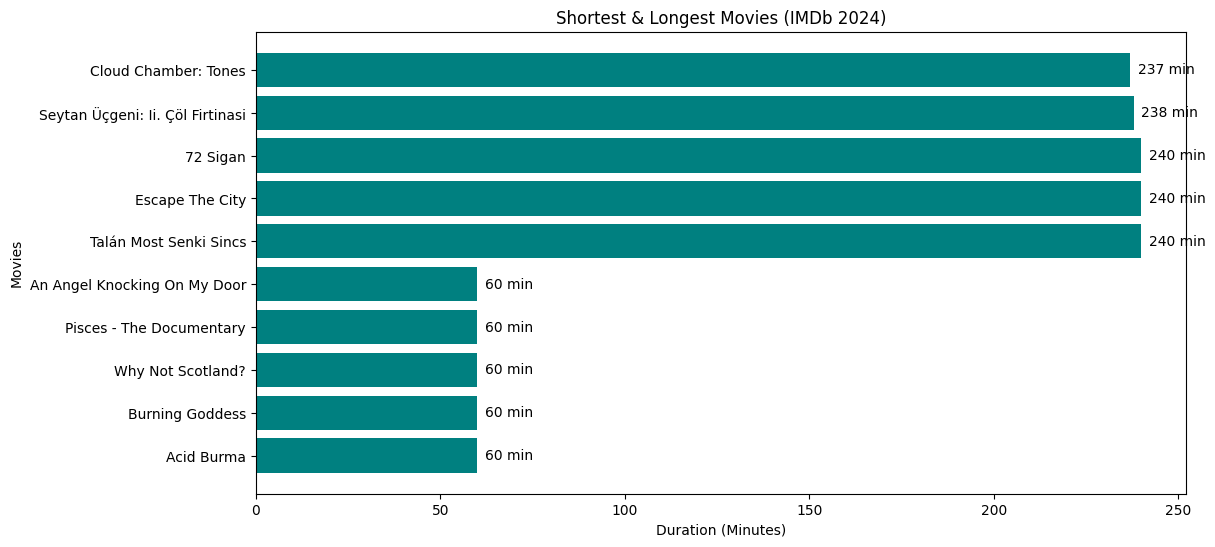

In [ ]:
# Shortest and Longest Movies
shortest_movies = df.sort_values(by="Duration", ascending=True).head(5)   # top 5 shortest
longest_movies  = df.sort_values(by="Duration", ascending=False).head(5)  # top 5 longest

print("Shortest Movies:")
print(shortest_movies[["Movie Name", "Duration"]])

print("\nLongest Movies:")
print(longest_movies[["Movie Name", "Duration"]])

import matplotlib.pyplot as plt

# Combine shortest and longest movies into one DataFrame
extremes = pd.concat([shortest_movies, longest_movies])

plt.figure(figsize=(12,6))
bars = plt.barh(extremes["Movie Name"], extremes["Duration"], color="teal")

# Annotate duration values at the end
for bar in bars:
    plt.text(bar.get_width() + 2, bar.get_y() + bar.get_height()/2,
             f"{int(bar.get_width())} min", va="center")

plt.xlabel("Duration (Minutes)")
plt.ylabel("Movies")
plt.title("Shortest & Longest Movies (IMDb 2024)")
plt.show()


Top 10 Movies with Highest Voting Counts:
                    Movie Name  Voting Counts  Rating
4685            Dune: Part Two       659000.0     8.5
3969      Deadpool & Wolverine       522000.0     7.5
16880            The Substance       333000.0     7.2
5863   Furiosa: A Mad Max Saga       299000.0     7.5
6103              Gladiator Ii       270000.0     6.5
949             Alien: Romulus       262000.0     7.1
3310                 Civil War       249000.0     7.0
15719             The Fall Guy       233000.0     6.8
7522              Inside Out 2       229000.0     7.5
11273                Nosferatu       228000.0     7.2


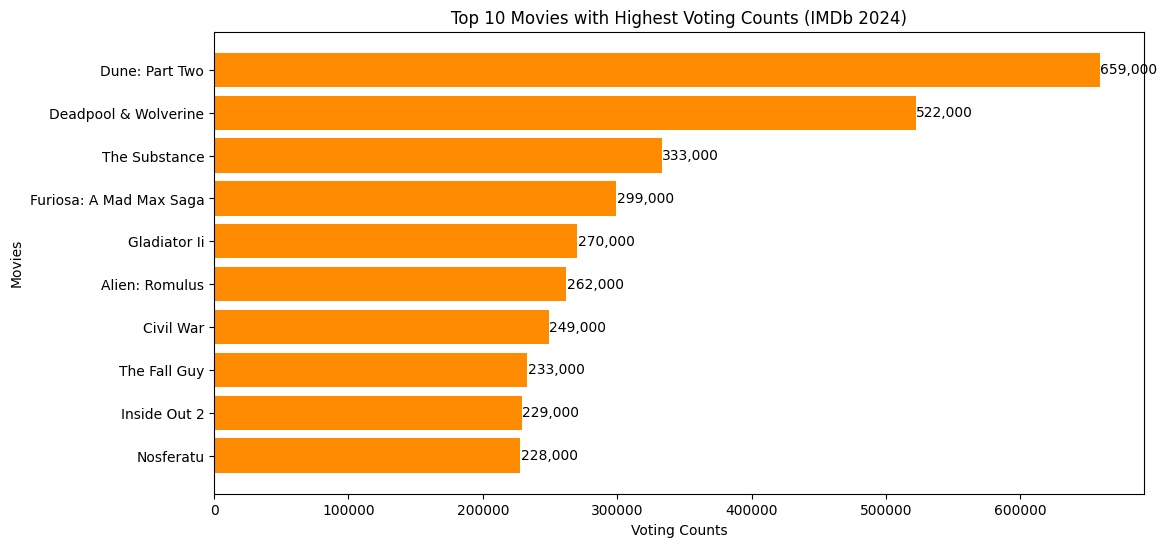

In [ ]:
# Top 10 Movies by Voting Counts
top_voted = df.sort_values(by="Voting Counts", ascending=False).head(10)

print("Top 10 Movies with Highest Voting Counts:")
print(top_voted[["Movie Name", "Voting Counts", "Rating"]])

# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
bars = plt.barh(top_voted["Movie Name"], top_voted["Voting Counts"], color="darkorange")

# Annotate voting counts at the end of each bar
for bar, vote in zip(bars, top_voted["Voting Counts"]):
    plt.text(bar.get_width() + 500, bar.get_y() + bar.get_height()/2,
             f"{int(vote):,}", va="center")

plt.xlabel("Voting Counts")
plt.ylabel("Movies")
plt.title("Top 10 Movies with Highest Voting Counts (IMDb 2024)")
plt.gca().invert_yaxis()  # Highest on top
plt.show()
